In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os 
#from ...util.model.training import get_percent

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
%pwd

'/Users/claudia/DSA4262-ACMXZ/preprocessing/notebooks'

In [3]:
sys.path.append(os.path.abspath('../../util/model'))
from training import get_percent

In [5]:
%pwd

'/Users/claudia/DSA4262-ACMXZ/preprocessing/notebooks'

In [4]:
info_data_path = "../../data/raw_data/data.info"
with open(info_data_path, 'r') as f:
    info = f.read().splitlines()
data_df1 = pd.read_parquet("../../data/merged_data/merged_data_v2_1.parquet")
data_df2 = pd.read_parquet("../../data/merged_data/merged_data_v2_2.parquet")
data_df3 = pd.read_parquet("../../data/merged_data/merged_data_v2_3.parquet")

In [5]:
print(data_df1.shape)
print(data_df2.shape)
print(data_df3.shape)

(5000000, 15)
(5000000, 15)
(1027106, 15)


In [6]:
raw_df =  pd.concat([data_df1, data_df2, data_df3])
raw_df.head()

,transcript,position,nucleotides,reads_count,dwellingtime_-1,std_-1,mean_-1,dwellingtime_0,std_0,mean_0,dwellingtime_+1,std_+1,mean_+1,gene_id,label
0,ENST00000000233,244,AAGACCA,185,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0
1,ENST00000000233,244,AAGACCA,185,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0
2,ENST00000000233,244,AAGACCA,185,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0
3,ENST00000000233,244,AAGACCA,185,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0
4,ENST00000000233,244,AAGACCA,185,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0


In [7]:
def model_features_and_clean(df):
    '''Function to select features for modelling and clean the initial raw data. 
        Removes rows which contain NAN values in key_columns, and converts all NAN values to 0 for non_nan_cols

    :Parameters:
    ------------
        self.df: DataFrame
            DataFrame containing raw data

    :Returns:
    ---------
        self.df: DataFrame
            DataFrame containing features required for modelling
    '''

    model_features_list = ['transcript', 'position', 'nucleotides', 'reads_count', 'gene_id',
                            'dwellingtime_-1', 'std_-1', 'mean_-1',
                            'dwellingtime_0', 'std_0', 'mean_0',
                            'dwellingtime_+1', 'std_+1', 'mean_+1','label']
    non_nan_cols = []
    key_columns = ['label'] 

    df = df[model_features_list]
    df[non_nan_cols] = df[non_nan_cols].fillna(0)
    df = df.dropna(subset=key_columns)
    return df

In [8]:
cleaned_df = model_features_and_clean(raw_df)
cleaned_df.head()

,transcript,position,nucleotides,reads_count,gene_id,dwellingtime_-1,std_-1,mean_-1,dwellingtime_0,std_0,mean_0,dwellingtime_+1,std_+1,mean_+1,label
0,ENST00000000233,244,AAGACCA,185,ENSG00000004059,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,0
1,ENST00000000233,244,AAGACCA,185,ENSG00000004059,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,0
2,ENST00000000233,244,AAGACCA,185,ENSG00000004059,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,0
3,ENST00000000233,244,AAGACCA,185,ENSG00000004059,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,0
4,ENST00000000233,244,AAGACCA,185,ENSG00000004059,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,0


In [9]:
# function to clean ==> added in np.min and np.max for all 
def feature_eng(df):
    temp = pd.DataFrame(df.groupby(['gene_id', 'transcript', 'position', 'nucleotides', 'reads_count', 'label'], as_index=False)
                           .agg({'dwellingtime_-1': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'std_-1': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'mean_-1': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'dwellingtime_0': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'std_0': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'mean_0': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'dwellingtime_+1': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'std_+1': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'mean_+1': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max]}))
    temp.columns = ['gene_id', 'transcript', 'position', 'nucleotides', 'reads_count', 'label',
                        'dwelling_time_-1_25', 'dwelling_time_-1_50', 'dwelling_time_-1_75', 'dwelling_time_-1_mean','dwelling_time_-1_min', 'dwelling_time_-1_max',
                        'std_-1_25', 'std_-1_50', 'std_-1_75', 'std_-1_mean','std_-1_min', 'std_-1_max',
                        'mean_-1_25', 'mean_-1_50', 'mean_-1_75', 'mean_-1_mean','mean_-1_min', 'mean_-1_max',
                        'dwelling_time_0_25', 'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean','dwelling_time_0_min','dwelling_time_0_max',
                        'std_0_25', 'std_0_50', 'std_0_75', 'std_0_mean','std_0_min', 'std_0_max',
                        'mean_0_25', 'mean_0_50', 'mean_0_75', 'mean_0_mean','mean_0_min', 'mean_0_max',
                        'dwelling_time_+1_25', 'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean','dwelling_time_+1_min','dwelling_time_+1_max',
                        'std_+1_25', 'std_+1_50', 'std_+1_75', 'std_+1_mean','std_+1_min', 'std_+1_max',
                        'mean_+1_25', 'mean_+1_50', 'mean_+1_75', 'mean_+1_mean','mean_+1_min', 'mean_+1_max']
    return temp

In [13]:
raw_df.columns

Index(['transcript', 'position', 'nucleotides', 'reads_count',
       'dwellingtime_-1', 'std_-1', 'mean_-1', 'dwellingtime_0', 'std_0',
       'mean_0', 'dwellingtime_+1', 'std_+1', 'mean_+1', 'gene_id', 'label'],
      dtype='object')

In [10]:
percentiles_df = feature_eng(cleaned_df)
percentiles_df.head()

,gene_id,transcript,position,nucleotides,reads_count,label,dwelling_time_-1_25,dwelling_time_-1_50,dwelling_time_-1_75,dwelling_time_-1_mean,dwelling_time_-1_min,dwelling_time_-1_max,std_-1_25,std_-1_50,std_-1_75,std_-1_mean,std_-1_min,std_-1_max,mean_-1_25,mean_-1_50,mean_-1_75,mean_-1_mean,mean_-1_min,mean_-1_max,dwelling_time_0_25,dwelling_time_0_50,dwelling_time_0_75,dwelling_time_0_mean,dwelling_time_0_min,dwelling_time_0_max,std_0_25,std_0_50,std_0_75,std_0_mean,std_0_min,std_0_max,mean_0_25,mean_0_50,mean_0_75,mean_0_mean,mean_0_min,mean_0_max,dwelling_time_+1_25,dwelling_time_+1_50,dwelling_time_+1_75,dwelling_time_+1_mean,dwelling_time_+1_min,dwelling_time_+1_max,std_+1_25,std_+1_50,std_+1_75,std_+1_mean,std_+1_min,std_+1_max,mean_+1_25,mean_+1_50,mean_+1_75,mean_+1_mean,mean_+1_min,mean_+1_max
0,ENSG00000000003,ENST00000373020,1006,TAGACCT,21,0,0.007650,0.009760,0.015100,0.010726,0.00299,0.0193,2.8900,3.100,3.3400,3.021905,2.05,3.65,118.000,119.00,120.00,118.952381,114.0,122.0,0.005980,0.009090,0.014900,0.011677,0.00266,0.0415,4.3000,5.600,7.5800,6.000000,2.140,12.80,125.00,127.00,128.00,127.000000,122.0,131.0,0.003650,0.005980,0.008300,0.006490,0.00232,0.0149,2.0600,3.210,5.1700,3.900476,1.100,9.19,75.800,77.10,77.800,76.857143,72.4,80.9
1,ENSG00000000003,ENST00000373020,1013,AAAACTA,20,0,0.007965,0.009800,0.013175,0.011538,0.00232,0.0362,2.1925,2.460,2.7325,2.471500,1.97,3.14,108.000,109.00,110.00,108.900000,107.0,112.0,0.003320,0.005305,0.007763,0.006050,0.00166,0.0153,3.8850,4.415,4.8200,4.091500,1.600,5.56,100.00,102.00,105.00,102.675000,99.1,108.0,0.006112,0.008840,0.011600,0.010213,0.00400,0.0272,2.4775,2.870,4.0100,3.299000,1.550,6.33,92.125,93.25,94.975,93.765000,90.2,99.7
2,ENSG00000000003,ENST00000373020,1149,GAAACAC,22,0,0.004917,0.007155,0.009473,0.008890,0.00266,0.0488,2.2100,3.030,4.2975,3.440909,1.58,7.93,104.000,105.00,107.00,105.363636,101.0,112.0,0.004958,0.006885,0.010733,0.008051,0.00266,0.0173,1.9875,2.570,2.9875,2.652227,0.389,4.73,96.80,98.50,100.75,99.081818,93.4,112.0,0.003928,0.006205,0.007833,0.006491,0.00266,0.0169,1.6300,1.855,2.2675,2.028182,1.220,4.30,89.450,90.65,92.600,90.777273,82.0,99.1
3,ENSG00000000003,ENST00000373020,512,ATAACTC,20,0,0.004040,0.005990,0.008387,0.007247,0.00266,0.0169,1.7400,2.325,2.7050,2.359500,1.28,3.91,85.775,87.05,87.35,86.795000,83.5,91.2,0.003980,0.007735,0.013375,0.011177,0.00232,0.0461,2.0800,2.375,2.7300,2.496500,1.480,4.34,97.05,98.05,99.05,97.965000,94.7,101.0,0.004870,0.006870,0.011200,0.008500,0.00266,0.0219,1.3900,1.570,1.8750,1.588750,0.917,2.18,92.100,92.55,93.325,92.330000,83.5,94.5
4,ENSG00000000003,ENST00000373020,689,TAAACAA,21,0,0.005310,0.007640,0.014300,0.009868,0.00232,0.0279,1.7500,1.980,2.2300,1.972857,1.16,2.78,102.000,103.00,104.00,102.495238,96.5,106.0,0.003650,0.006420,0.008960,0.007332,0.00232,0.0179,1.9600,2.430,2.9100,2.551905,1.420,4.12,96.20,98.70,99.70,97.928571,91.1,102.0,0.004580,0.005730,0.008590,0.006917,0.00299,0.0175,1.7400,2.190,2.3700,2.198571,1.350,4.15,88.500,89.60,90.600,89.385714,84.3,93.5


In [15]:
percentiles_df.shape

(121838, 60)

In [59]:
# raw_df.loc[(raw_df['nucleotides']=='AAGACTG') & (raw_df['position'] == '2996') & (raw_df['transcript'] == 'ENST00000621914') ]

In [11]:
def relative_position(percentile_df):
    percentiles_df['position'] = percentiles_df['position'].astype(int)
    # find the relative position of each read in each transcript
    percentiles_df['relative_position'] = percentiles_df.groupby(['transcript','gene_id'])['position'].transform(lambda x: (x - x.min())/(x.max()-x.min()))
    # note: have NAs because there's transcripts with only one position
    # fill the NAs with 0
    percentiles_df['relative_position'] = percentiles_df['relative_position'].fillna(0)
    return percentile_df

In [14]:
percentiles_df = relative_position(percentiles_df)

In [15]:
percentiles_df.head()

,gene_id,transcript,position,nucleotides,reads_count,label,dwelling_time_-1_25,dwelling_time_-1_50,dwelling_time_-1_75,dwelling_time_-1_mean,dwelling_time_-1_min,dwelling_time_-1_max,std_-1_25,std_-1_50,std_-1_75,std_-1_mean,std_-1_min,std_-1_max,mean_-1_25,mean_-1_50,mean_-1_75,mean_-1_mean,mean_-1_min,mean_-1_max,dwelling_time_0_25,dwelling_time_0_50,dwelling_time_0_75,dwelling_time_0_mean,dwelling_time_0_min,dwelling_time_0_max,std_0_25,std_0_50,std_0_75,std_0_mean,std_0_min,std_0_max,mean_0_25,mean_0_50,mean_0_75,mean_0_mean,mean_0_min,mean_0_max,dwelling_time_+1_25,dwelling_time_+1_50,dwelling_time_+1_75,dwelling_time_+1_mean,dwelling_time_+1_min,dwelling_time_+1_max,std_+1_25,std_+1_50,std_+1_75,std_+1_mean,std_+1_min,std_+1_max,mean_+1_25,mean_+1_50,mean_+1_75,mean_+1_mean,mean_+1_min,mean_+1_max,relative_position
0,ENSG00000000003,ENST00000373020,1006,TAGACCT,21,0,0.007650,0.009760,0.015100,0.010726,0.00299,0.0193,2.8900,3.100,3.3400,3.021905,2.05,3.65,118.000,119.00,120.00,118.952381,114.0,122.0,0.005980,0.009090,0.014900,0.011677,0.00266,0.0415,4.3000,5.600,7.5800,6.000000,2.140,12.80,125.00,127.00,128.00,127.000000,122.0,131.0,0.003650,0.005980,0.008300,0.006490,0.00232,0.0149,2.0600,3.210,5.1700,3.900476,1.100,9.19,75.800,77.10,77.800,76.857143,72.4,80.9,0.775510
1,ENSG00000000003,ENST00000373020,1013,AAAACTA,20,0,0.007965,0.009800,0.013175,0.011538,0.00232,0.0362,2.1925,2.460,2.7325,2.471500,1.97,3.14,108.000,109.00,110.00,108.900000,107.0,112.0,0.003320,0.005305,0.007763,0.006050,0.00166,0.0153,3.8850,4.415,4.8200,4.091500,1.600,5.56,100.00,102.00,105.00,102.675000,99.1,108.0,0.006112,0.008840,0.011600,0.010213,0.00400,0.0272,2.4775,2.870,4.0100,3.299000,1.550,6.33,92.125,93.25,94.975,93.765000,90.2,99.7,0.786499
2,ENSG00000000003,ENST00000373020,1149,GAAACAC,22,0,0.004917,0.007155,0.009473,0.008890,0.00266,0.0488,2.2100,3.030,4.2975,3.440909,1.58,7.93,104.000,105.00,107.00,105.363636,101.0,112.0,0.004958,0.006885,0.010733,0.008051,0.00266,0.0173,1.9875,2.570,2.9875,2.652227,0.389,4.73,96.80,98.50,100.75,99.081818,93.4,112.0,0.003928,0.006205,0.007833,0.006491,0.00266,0.0169,1.6300,1.855,2.2675,2.028182,1.220,4.30,89.450,90.65,92.600,90.777273,82.0,99.1,1.000000
3,ENSG00000000003,ENST00000373020,512,ATAACTC,20,0,0.004040,0.005990,0.008387,0.007247,0.00266,0.0169,1.7400,2.325,2.7050,2.359500,1.28,3.91,85.775,87.05,87.35,86.795000,83.5,91.2,0.003980,0.007735,0.013375,0.011177,0.00232,0.0461,2.0800,2.375,2.7300,2.496500,1.480,4.34,97.05,98.05,99.05,97.965000,94.7,101.0,0.004870,0.006870,0.011200,0.008500,0.00266,0.0219,1.3900,1.570,1.8750,1.588750,0.917,2.18,92.100,92.55,93.325,92.330000,83.5,94.5,0.000000
4,ENSG00000000003,ENST00000373020,689,TAAACAA,21,0,0.005310,0.007640,0.014300,0.009868,0.00232,0.0279,1.7500,1.980,2.2300,1.972857,1.16,2.78,102.000,103.00,104.00,102.495238,96.5,106.0,0.003650,0.006420,0.008960,0.007332,0.00232,0.0179,1.9600,2.430,2.9100,2.551905,1.420,4.12,96.20,98.70,99.70,97.928571,91.1,102.0,0.004580,0.005730,0.008590,0.006917,0.00299,0.0175,1.7400,2.190,2.3700,2.198571,1.350,4.15,88.500,89.60,90.600,89.385714,84.3,93.5,0.277865


In [18]:
percentiles_df.shape

(121838, 61)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
def split_stratified_into_train_val_test(df, random_state=None):

    id_col = ['gene_id']
    position_col = ['transcript', 'position']
    stratify_col = 'label'
    target_col = 'label'
    train_percent = 0.8 # percentage of train data
    validation_percent = 0.1 # percentage of validation data
    test_percent = 0.1 # percentage of test data


    # getting unique id_col and stratify_col for splitting
    split_col = id_col + [stratify_col]
    df_target = df[split_col].drop_duplicates()
    X = df_target  # Contains all columns.
    # Dataframe of just the column on which to stratify.
    y = df_target[[stratify_col]]

    # parameter checks
    if train_percent + validation_percent + test_percent != 1.0:
        raise ValueError('fractions %f, %f, %f do not add up to 1.0' %
                            (train_percent, validation_percent, test_percent))

    if stratify_col not in df_target.columns:
        raise ValueError('%s is not a column in the dataframe' %
                            (stratify_col))

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(X, y, stratify=y,
                                                                    test_size=(
                                                                        1.0 - train_percent),
                                                                    random_state=random_state)

    # Split the temp dataframe into val and test dataframes.
    relative_test_percent = test_percent / (validation_percent + test_percent)
    df_val, df_test, y_val, y_test = train_test_split(df_temp, y_temp,
                                                                            stratify=y_temp,
                                                                            test_size=relative_test_percent,
                                                                            random_state=random_state)

    assert len(df_target) == len(df_train) + len(df_val) + len(df_test)

    # getting list of splitting columns of each df
    list_train = np.array(df_train[split_col])
    list_train = [tuple(i) for i in list_train]
    list_test = np.array(df_test[split_col])
    list_test = [tuple(i) for i in list_test]
    list_val = np.array(df_val[split_col])
    list_val = [tuple(i) for i in list_val]

    # creating train/test/val data.
    df_train = df[df[split_col].apply(tuple, axis=1).isin(list_train)]
    df_test = df[df[split_col].apply(tuple, axis=1).isin(list_test)]
    df_val = df[df[split_col].apply(tuple, axis=1).isin(list_val)]
    # df_val_id contains all features + idenifying columns
    df_val_id = df_val.copy()

    # printing percentages
    print("train target percentage:", len(df_train[df_train[target_col] == '1'])/len(df_train))
    print("test target percentage:", len(df_test[df_test[target_col] == '1'])/len(df_test))
    print("val target percentage:", len(df_val[df_val[target_col] == '1'])/len(df_val))

    # printing df shape
    print("train data shape:", df_train.shape)
    print("validation data shape:", df_val.shape)
    print("test data shape:", df_test.shape)

    # separating df from target column: features -> X | target -> y
    # removing identifying columns as they are not features
    temp_col = split_col + position_col
    X_train = df_train.drop(columns=temp_col).reset_index(drop=True)
    y_train = pd.DataFrame(df_train[target_col]).reset_index(drop=True)
    X_val = df_val.drop(columns=temp_col).reset_index(drop=True)
    y_val = pd.DataFrame(df_val[target_col]).reset_index(drop=True)
    X_test = df_test.drop(columns=temp_col).reset_index(drop=True)
    y_test = pd.DataFrame(df_test[target_col]).reset_index(drop=True)

    return(df_train, df_test, df_val, X_train, y_train,
            X_val, y_val, X_test, y_test, df_val_id, list_train)

In [21]:
df_train, df_test, df_val, X_train, y_train, X_val, y_val, X_test, y_test, df_val_id, list_train = split_stratified_into_train_val_test(percentiles_df, random_state=42)

train target percentage: 0.043292122202922244
test target percentage: 0.0506553911205074
val target percentage: 0.052622910318702136
train data shape: (97870, 61)
validation data shape: (12143, 61)
test data shape: (11825, 61)


In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(97870, 57)
(97870, 1)
(11825, 57)
(11825, 1)
(12143, 57)
(12143, 1)


In [23]:
df_train.head()

,gene_id,transcript,position,nucleotides,reads_count,label,dwelling_time_-1_25,dwelling_time_-1_50,dwelling_time_-1_75,dwelling_time_-1_mean,dwelling_time_-1_min,dwelling_time_-1_max,std_-1_25,std_-1_50,std_-1_75,std_-1_mean,std_-1_min,std_-1_max,mean_-1_25,mean_-1_50,mean_-1_75,mean_-1_mean,mean_-1_min,mean_-1_max,dwelling_time_0_25,dwelling_time_0_50,dwelling_time_0_75,dwelling_time_0_mean,dwelling_time_0_min,dwelling_time_0_max,std_0_25,std_0_50,std_0_75,std_0_mean,std_0_min,std_0_max,mean_0_25,mean_0_50,mean_0_75,mean_0_mean,mean_0_min,mean_0_max,dwelling_time_+1_25,dwelling_time_+1_50,dwelling_time_+1_75,dwelling_time_+1_mean,dwelling_time_+1_min,dwelling_time_+1_max,std_+1_25,std_+1_50,std_+1_75,std_+1_mean,std_+1_min,std_+1_max,mean_+1_25,mean_+1_50,mean_+1_75,mean_+1_mean,mean_+1_min,mean_+1_max,relative_position
0,ENSG00000000003,ENST00000373020,1006,TAGACCT,21,0,0.007650,0.009760,0.015100,0.010726,0.00299,0.0193,2.8900,3.100,3.3400,3.021905,2.05,3.65,118.000,119.00,120.00,118.952381,114.0,122.0,0.005980,0.009090,0.014900,0.011677,0.00266,0.0415,4.3000,5.600,7.5800,6.000000,2.140,12.80,125.00,127.00,128.00,127.000000,122.0,131.0,0.003650,0.005980,0.008300,0.006490,0.00232,0.0149,2.0600,3.210,5.1700,3.900476,1.100,9.19,75.800,77.10,77.800,76.857143,72.4,80.9,0.775510
1,ENSG00000000003,ENST00000373020,1013,AAAACTA,20,0,0.007965,0.009800,0.013175,0.011538,0.00232,0.0362,2.1925,2.460,2.7325,2.471500,1.97,3.14,108.000,109.00,110.00,108.900000,107.0,112.0,0.003320,0.005305,0.007763,0.006050,0.00166,0.0153,3.8850,4.415,4.8200,4.091500,1.600,5.56,100.00,102.00,105.00,102.675000,99.1,108.0,0.006112,0.008840,0.011600,0.010213,0.00400,0.0272,2.4775,2.870,4.0100,3.299000,1.550,6.33,92.125,93.25,94.975,93.765000,90.2,99.7,0.786499
2,ENSG00000000003,ENST00000373020,1149,GAAACAC,22,0,0.004917,0.007155,0.009473,0.008890,0.00266,0.0488,2.2100,3.030,4.2975,3.440909,1.58,7.93,104.000,105.00,107.00,105.363636,101.0,112.0,0.004958,0.006885,0.010733,0.008051,0.00266,0.0173,1.9875,2.570,2.9875,2.652227,0.389,4.73,96.80,98.50,100.75,99.081818,93.4,112.0,0.003928,0.006205,0.007832,0.006491,0.00266,0.0169,1.6300,1.855,2.2675,2.028182,1.220,4.30,89.450,90.65,92.600,90.777273,82.0,99.1,1.000000
3,ENSG00000000003,ENST00000373020,512,ATAACTC,20,0,0.004040,0.005990,0.008387,0.007247,0.00266,0.0169,1.7400,2.325,2.7050,2.359500,1.28,3.91,85.775,87.05,87.35,86.795000,83.5,91.2,0.003980,0.007735,0.013375,0.011178,0.00232,0.0461,2.0800,2.375,2.7300,2.496500,1.480,4.34,97.05,98.05,99.05,97.965000,94.7,101.0,0.004870,0.006870,0.011200,0.008500,0.00266,0.0219,1.3900,1.570,1.8750,1.588750,0.917,2.18,92.100,92.55,93.325,92.330000,83.5,94.5,0.000000
4,ENSG00000000003,ENST00000373020,689,TAAACAA,21,0,0.005310,0.007640,0.014300,0.009868,0.00232,0.0279,1.7500,1.980,2.2300,1.972857,1.16,2.78,102.000,103.00,104.00,102.495238,96.5,106.0,0.003650,0.006420,0.008960,0.007332,0.00232,0.0179,1.9600,2.430,2.9100,2.551905,1.420,4.12,96.20,98.70,99.70,97.928571,91.1,102.0,0.004580,0.005730,0.008590,0.006917,0.00299,0.0175,1.7400,2.190,2.3700,2.198571,1.350,4.15,88.500,89.60,90.600,89.385714,84.3,93.5,0.277865


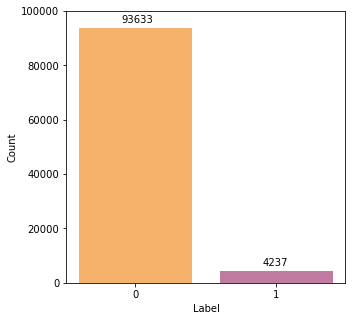

In [41]:
label_count = list(df_train["label"].value_counts())
labels = ("0", "1")
x_pos = np.arange(2)

plt.figure(figsize = (5, 5))
plt.bar(x_pos, label_count, color = ["#f6b26bff", "#c27ba0ff"])
plt.ylim([0, 100000])
plt.xticks(x_pos, labels)
plt.ylabel("Count")
plt.xlabel("Label")

for index, value in enumerate(label_count):
    plt.text(index - 0.1, value + 2000, str(value))
 
plt.show()

In [42]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC

In [43]:
def oversample_undersample(X_train, y_train, sampling=True):

    undersampling_strategy = 0.17
    oversampling_strategy = 0.22
    seed = 42 

    X_train_oversampled = X_train.copy()

    if sampling:
        undersample = RandomUnderSampler(sampling_strategy=undersampling_strategy, random_state=seed)
        oversample = SMOTENC(categorical_features=[0], sampling_strategy=oversampling_strategy, random_state=seed)
        X_train_oversampled, y_train = undersample.fit_resample(X_train_oversampled, y_train)
        X_train_oversampled, y_train = oversample.fit_resample(X_train_oversampled, y_train)

    return X_train_oversampled, y_train

In [44]:
df_train.head()

,gene_id,transcript,position,nucleotides,reads_count,label,dwelling_time_-1_25,dwelling_time_-1_50,dwelling_time_-1_75,dwelling_time_-1_mean,dwelling_time_-1_min,dwelling_time_-1_max,std_-1_25,std_-1_50,std_-1_75,std_-1_mean,std_-1_min,std_-1_max,mean_-1_25,mean_-1_50,mean_-1_75,mean_-1_mean,mean_-1_min,mean_-1_max,dwelling_time_0_25,dwelling_time_0_50,dwelling_time_0_75,dwelling_time_0_mean,dwelling_time_0_min,dwelling_time_0_max,std_0_25,std_0_50,std_0_75,std_0_mean,std_0_min,std_0_max,mean_0_25,mean_0_50,mean_0_75,mean_0_mean,mean_0_min,mean_0_max,dwelling_time_+1_25,dwelling_time_+1_50,dwelling_time_+1_75,dwelling_time_+1_mean,dwelling_time_+1_min,dwelling_time_+1_max,std_+1_25,std_+1_50,std_+1_75,std_+1_mean,std_+1_min,std_+1_max,mean_+1_25,mean_+1_50,mean_+1_75,mean_+1_mean,mean_+1_min,mean_+1_max,relative_position
0,ENSG00000000003,ENST00000373020,1006,TAGACCT,21,0,0.007650,0.009760,0.015100,0.010726,0.00299,0.0193,2.8900,3.100,3.3400,3.021905,2.05,3.65,118.000,119.00,120.00,118.952381,114.0,122.0,0.005980,0.009090,0.014900,0.011677,0.00266,0.0415,4.3000,5.600,7.5800,6.000000,2.140,12.80,125.00,127.00,128.00,127.000000,122.0,131.0,0.003650,0.005980,0.008300,0.006490,0.00232,0.0149,2.0600,3.210,5.1700,3.900476,1.100,9.19,75.800,77.10,77.800,76.857143,72.4,80.9,0.775510
1,ENSG00000000003,ENST00000373020,1013,AAAACTA,20,0,0.007965,0.009800,0.013175,0.011538,0.00232,0.0362,2.1925,2.460,2.7325,2.471500,1.97,3.14,108.000,109.00,110.00,108.900000,107.0,112.0,0.003320,0.005305,0.007763,0.006050,0.00166,0.0153,3.8850,4.415,4.8200,4.091500,1.600,5.56,100.00,102.00,105.00,102.675000,99.1,108.0,0.006112,0.008840,0.011600,0.010213,0.00400,0.0272,2.4775,2.870,4.0100,3.299000,1.550,6.33,92.125,93.25,94.975,93.765000,90.2,99.7,0.786499
2,ENSG00000000003,ENST00000373020,1149,GAAACAC,22,0,0.004917,0.007155,0.009473,0.008890,0.00266,0.0488,2.2100,3.030,4.2975,3.440909,1.58,7.93,104.000,105.00,107.00,105.363636,101.0,112.0,0.004958,0.006885,0.010733,0.008051,0.00266,0.0173,1.9875,2.570,2.9875,2.652227,0.389,4.73,96.80,98.50,100.75,99.081818,93.4,112.0,0.003928,0.006205,0.007832,0.006491,0.00266,0.0169,1.6300,1.855,2.2675,2.028182,1.220,4.30,89.450,90.65,92.600,90.777273,82.0,99.1,1.000000
3,ENSG00000000003,ENST00000373020,512,ATAACTC,20,0,0.004040,0.005990,0.008387,0.007247,0.00266,0.0169,1.7400,2.325,2.7050,2.359500,1.28,3.91,85.775,87.05,87.35,86.795000,83.5,91.2,0.003980,0.007735,0.013375,0.011178,0.00232,0.0461,2.0800,2.375,2.7300,2.496500,1.480,4.34,97.05,98.05,99.05,97.965000,94.7,101.0,0.004870,0.006870,0.011200,0.008500,0.00266,0.0219,1.3900,1.570,1.8750,1.588750,0.917,2.18,92.100,92.55,93.325,92.330000,83.5,94.5,0.000000
4,ENSG00000000003,ENST00000373020,689,TAAACAA,21,0,0.005310,0.007640,0.014300,0.009868,0.00232,0.0279,1.7500,1.980,2.2300,1.972857,1.16,2.78,102.000,103.00,104.00,102.495238,96.5,106.0,0.003650,0.006420,0.008960,0.007332,0.00232,0.0179,1.9600,2.430,2.9100,2.551905,1.420,4.12,96.20,98.70,99.70,97.928571,91.1,102.0,0.004580,0.005730,0.008590,0.006917,0.00299,0.0175,1.7400,2.190,2.3700,2.198571,1.350,4.15,88.500,89.60,90.600,89.385714,84.3,93.5,0.277865


In [45]:
X_train_oversampled, y_train = oversample_undersample(X_train, y_train)

In [46]:
X_train_oversampled.head()

,nucleotides,reads_count,dwelling_time_-1_25,dwelling_time_-1_50,dwelling_time_-1_75,dwelling_time_-1_mean,dwelling_time_-1_min,dwelling_time_-1_max,std_-1_25,std_-1_50,std_-1_75,std_-1_mean,std_-1_min,std_-1_max,mean_-1_25,mean_-1_50,mean_-1_75,mean_-1_mean,mean_-1_min,mean_-1_max,dwelling_time_0_25,dwelling_time_0_50,dwelling_time_0_75,dwelling_time_0_mean,dwelling_time_0_min,dwelling_time_0_max,std_0_25,std_0_50,std_0_75,std_0_mean,std_0_min,std_0_max,mean_0_25,mean_0_50,mean_0_75,mean_0_mean,mean_0_min,mean_0_max,dwelling_time_+1_25,dwelling_time_+1_50,dwelling_time_+1_75,dwelling_time_+1_mean,dwelling_time_+1_min,dwelling_time_+1_max,std_+1_25,std_+1_50,std_+1_75,std_+1_mean,std_+1_min,std_+1_max,mean_+1_25,mean_+1_50,mean_+1_75,mean_+1_mean,mean_+1_min,mean_+1_max,relative_position
0,CAAACCT,32,0.004593,0.00610,0.008528,0.006813,0.00232,0.0132,2.3825,2.605,3.180,2.743750,1.68,4.18,105.0,107.0,108.25,106.625000,101.0,110.0,0.003650,0.004485,0.005975,0.005411,0.00232,0.0173,2.8125,3.70,4.430,3.648125,1.35,6.59,94.30,95.85,98.725,97.206250,91.8,109.0,0.004148,0.006475,0.008938,0.006500,0.00199,0.0120,1.795,2.10,2.9175,2.430313,1.12,6.56,84.25,85.75,87.80,85.828125,76.7,93.8,0.634226
1,CGGACCT,43,0.003955,0.00552,0.008790,0.006847,0.00232,0.0169,1.9200,2.670,3.715,3.126744,1.07,8.76,118.0,121.0,122.00,119.883721,111.0,126.0,0.004650,0.006700,0.009795,0.008437,0.00266,0.0286,4.4300,6.42,9.285,7.033256,1.51,19.50,118.00,121.00,124.000,120.232558,104.0,129.0,0.003605,0.005030,0.006900,0.005803,0.00232,0.0167,2.210,2.44,3.5150,3.198605,1.75,8.39,77.15,78.50,80.30,78.806977,72.6,84.9,0.897837
2,GTAACAA,23,0.002860,0.00432,0.005935,0.004690,0.00232,0.0110,1.6350,2.220,3.100,2.689130,1.14,6.32,87.1,88.8,89.80,89.017391,85.2,96.0,0.004320,0.005640,0.008065,0.006497,0.00232,0.0157,1.8650,2.28,2.760,2.716087,1.56,6.53,91.95,93.20,94.350,93.686957,89.9,102.0,0.004440,0.005450,0.008620,0.007998,0.00266,0.0229,1.820,2.10,2.2650,2.232609,1.45,6.79,85.55,87.50,90.00,87.652174,84.0,92.6,0.017385
3,CTGACAT,45,0.004520,0.00598,0.008300,0.006963,0.00299,0.0302,2.7100,3.260,3.790,3.634444,1.83,10.70,106.0,108.0,110.00,106.895556,93.2,112.0,0.003780,0.004980,0.008110,0.006140,0.00266,0.0163,5.8700,8.00,10.200,8.161556,2.27,13.40,118.00,121.00,122.000,119.866667,108.0,126.0,0.003870,0.005130,0.009300,0.006688,0.00232,0.0269,1.760,2.43,2.9900,2.522667,1.09,5.85,82.10,83.10,85.60,83.806667,78.7,88.9,0.663397
4,CAAACTT,23,0.003025,0.00496,0.006180,0.005193,0.00199,0.0149,1.4300,2.300,2.855,2.444783,1.08,7.40,97.2,104.0,110.50,103.521739,95.6,113.0,0.004955,0.006200,0.009075,0.007418,0.00232,0.0195,1.9550,2.33,2.775,2.332609,1.32,3.01,106.50,108.00,110.500,108.260870,100.0,112.0,0.004485,0.006310,0.007825,0.007254,0.00332,0.0204,2.000,2.23,2.7400,2.432174,1.56,3.83,93.85,95.40,97.45,95.360870,90.9,98.2,0.328179


In [47]:
X_train_oversampled.shape

(30406, 57)

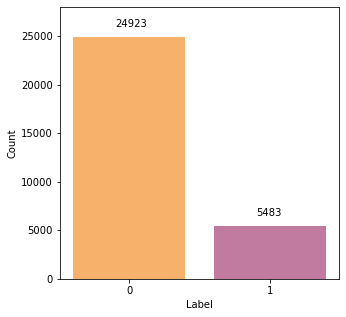

In [54]:
label_count = list(y_train["label"].value_counts())
labels = ("0", "1")
x_pos = np.arange(2)

plt.figure(figsize = (5, 5))
plt.bar(x_pos, label_count, color = ["#f6b26bff", "#c27ba0ff"])
plt.ylim([0, 28000])
plt.xticks(x_pos, labels)
plt.ylabel("Count")
plt.xlabel("Label")

for index, value in enumerate(label_count):
    plt.text(index - 0.1, value + 1000, str(value))
 
plt.show()

In [52]:
y_train['label'].value_counts()

0    24923
1     5483
Name: label, dtype: int64

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from category_encoders import OneHotEncoder

In [54]:
X_train_oversampled.columns

Index(['nucleotides', 'reads_count', 'dwelling_time_-1_25',
       'dwelling_time_-1_50', 'dwelling_time_-1_75', 'dwelling_time_-1_mean',
       'dwelling_time_-1_min', 'dwelling_time_-1_max', 'std_-1_25',
       'std_-1_50', 'std_-1_75', 'std_-1_mean', 'std_-1_min', 'std_-1_max',
       'mean_-1_25', 'mean_-1_50', 'mean_-1_75', 'mean_-1_mean', 'mean_-1_min',
       'mean_-1_max', 'dwelling_time_0_25', 'dwelling_time_0_50',
       'dwelling_time_0_75', 'dwelling_time_0_mean', 'dwelling_time_0_min',
       'dwelling_time_0_max', 'std_0_25', 'std_0_50', 'std_0_75', 'std_0_mean',
       'std_0_min', 'std_0_max', 'mean_0_25', 'mean_0_50', 'mean_0_75',
       'mean_0_mean', 'mean_0_min', 'mean_0_max', 'dwelling_time_+1_25',
       'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean',
       'dwelling_time_+1_min', 'dwelling_time_+1_max', 'std_+1_25',
       'std_+1_50', 'std_+1_75', 'std_+1_mean', 'std_+1_min', 'std_+1_max',
       'mean_+1_25', 'mean_+1_50', 'mean_+1_75', 

In [63]:
def encoding_train(X_train_oversampled, y_train):
    # new numeric cols
    numeric_cols =  ['reads_count','dwelling_time_-1_25',
                    'dwelling_time_-1_50', 'dwelling_time_-1_75', 'dwelling_time_-1_mean', 'dwelling_time_-1_min', 'dwelling_time_-1_max',
                    'std_-1_25', 'std_-1_50', 'std_-1_75', 'std_-1_mean', 'std_-1_min', 'std_-1_max', 'mean_-1_25',
                    'mean_-1_50', 'mean_-1_75', 'mean_-1_mean', 'mean_-1_min', 'mean_-1_max', 'dwelling_time_0_25',
                    'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean',  'dwelling_time_0_min', 'dwelling_time_0_max',
                    'std_0_25', 'std_0_50', 'std_0_75', 'std_0_mean',  'std_0_min', 'std_0_max', 'mean_0_25',
                    'mean_0_50', 'mean_0_75', 'mean_0_mean','mean_0_min', 'mean_0_max', 'dwelling_time_+1_25',
                    'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean', 'dwelling_time_+1_min', 'dwelling_time_+1_max',
                    'std_+1_25', 'std_+1_50', 'std_+1_75', 'std_+1_mean','std_+1_min', 'std_+1_max', 'mean_+1_25',
                    'mean_+1_50', 'mean_+1_75', 'mean_+1_mean', 'mean_+1_min','mean_+1_max', 'relative_position']
    one_hot_col = ['position_0', 'position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'position_6']

    # piping the encoding
    numeric_encoder = Pipeline([('scale', StandardScaler())])
    one_hot_encoder = Pipeline([('one_hot_enocde', OneHotEncoder(handle_unknown='ignore'))])
    preprocessor = ColumnTransformer(transformers=[("num", numeric_encoder, numeric_cols), 
                                                    ("one_hot_encode", one_hot_encoder, one_hot_col)], remainder='passthrough')

    # getting list of column names to map
    for i in range(7):
        X_train_oversampled['position_' + str(i)] = X_train_oversampled['nucleotides'].apply(lambda x: x[i])
    ref_df = X_train_oversampled # df used as reference for encoding
    columns_to_map = numeric_cols
    one_hot = OneHotEncoder(handle_unknown='ignore',use_cat_names=True)
    x_df_ohe = pd.DataFrame(one_hot.fit_transform(ref_df[one_hot_col]))
    x_df_ohe.columns = one_hot.get_feature_names()
    columns_to_map = numeric_cols + list(x_df_ohe.columns)

    print('columns after preprocessing :', columns_to_map,  '\n')

    # applying encoding on columns in df and creating pipeline
    X_train_enc = pd.DataFrame({col: vals for vals, col in zip(preprocessor.fit_transform(ref_df, y_train).T, columns_to_map)})
    pipe = Pipeline(steps=[("preprocessor", preprocessor)])
    pipe = pipe.fit(ref_df, y_train)

    # # encoding nucleotides
    # for i in range(7):
    #     self.X_train_enc['position_' + str(i) + '_A'] = 0
    #     self.X_train_enc['position_' + str(i) + '_C'] = 0
    #     self.X_train_enc['position_' + str(i) + '_G'] = 0
    #     self.X_train_enc['position_' + str(i) + '_T'] = 0
    #     temp = self.X_train_enc['nucleotides'].apply(lambda x: x[i])
    #     self.X_train_enc['position_' + str(i) + '_A'][temp == 'A'] = 1
    #     self.X_train_enc['position_' + str(i) + '_C'][temp == 'C'] = 1
    #     self.X_train_enc['position_' + str(i) + '_G'][temp == 'G'] = 1
    #     self.X_train_enc['position_' + str(i) + '_T'][temp == 'T'] = 1

    # # dropping nucleotides column
    # self.X_train_enc = self.X_train_enc.drop(columns=['nucleotides'])

    return X_train_enc, pipe, columns_to_map

In [64]:
X_train_enc, pipe, columns_to_map = encoding_train(X_train_oversampled, y_train)

columns after preprocessing : ['reads_count', 'dwelling_time_-1_25', 'dwelling_time_-1_50', 'dwelling_time_-1_75', 'dwelling_time_-1_mean', 'dwelling_time_-1_min', 'dwelling_time_-1_max', 'std_-1_25', 'std_-1_50', 'std_-1_75', 'std_-1_mean', 'std_-1_min', 'std_-1_max', 'mean_-1_25', 'mean_-1_50', 'mean_-1_75', 'mean_-1_mean', 'mean_-1_min', 'mean_-1_max', 'dwelling_time_0_25', 'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean', 'dwelling_time_0_min', 'dwelling_time_0_max', 'std_0_25', 'std_0_50', 'std_0_75', 'std_0_mean', 'std_0_min', 'std_0_max', 'mean_0_25', 'mean_0_50', 'mean_0_75', 'mean_0_mean', 'mean_0_min', 'mean_0_max', 'dwelling_time_+1_25', 'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean', 'dwelling_time_+1_min', 'dwelling_time_+1_max', 'std_+1_25', 'std_+1_50', 'std_+1_75', 'std_+1_mean', 'std_+1_min', 'std_+1_max', 'mean_+1_25', 'mean_+1_50', 'mean_+1_75', 'mean_+1_mean', 'mean_+1_min', 'mean_+1_max', 'relative_position', 'position_0_C',

In [65]:
print(X_train.shape)
print(X_train_enc.shape)

(97870, 57)
(30406, 74)


In [66]:
X_train_enc.columns

Index(['reads_count', 'dwelling_time_-1_25', 'dwelling_time_-1_50',
       'dwelling_time_-1_75', 'dwelling_time_-1_mean', 'dwelling_time_-1_min',
       'dwelling_time_-1_max', 'std_-1_25', 'std_-1_50', 'std_-1_75',
       'std_-1_mean', 'std_-1_min', 'std_-1_max', 'mean_-1_25', 'mean_-1_50',
       'mean_-1_75', 'mean_-1_mean', 'mean_-1_min', 'mean_-1_max',
       'dwelling_time_0_25', 'dwelling_time_0_50', 'dwelling_time_0_75',
       'dwelling_time_0_mean', 'dwelling_time_0_min', 'dwelling_time_0_max',
       'std_0_25', 'std_0_50', 'std_0_75', 'std_0_mean', 'std_0_min',
       'std_0_max', 'mean_0_25', 'mean_0_50', 'mean_0_75', 'mean_0_mean',
       'mean_0_min', 'mean_0_max', 'dwelling_time_+1_25',
       'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean',
       'dwelling_time_+1_min', 'dwelling_time_+1_max', 'std_+1_25',
       'std_+1_50', 'std_+1_75', 'std_+1_mean', 'std_+1_min', 'std_+1_max',
       'mean_+1_25', 'mean_+1_50', 'mean_+1_75', 'mean_+1_mean',

In [67]:
def encoding_test_val(X_test, X_val, columns_to_map, test=True):

    # applying encoding on columns in df
    if test == True:  # for test
        for i in range(7):
            X_test['position_' + str(i)] = X_test['nucleotides'].apply(lambda x: x[i])
        X_test_enc = pd.DataFrame({col: vals for vals, col in zip(pipe.transform(X_test).T, columns_to_map)})


        return X_test_enc
    else:  # for validation
        for i in range(7):
            X_val['position_' + str(i)] = X_val['nucleotides'].apply(lambda x: x[i])
        X_val_enc = pd.DataFrame({col: vals for vals, col in zip(pipe.transform(X_val).T, columns_to_map)})

        return X_val_enc

In [68]:
X_test_enc = encoding_test_val(X_test, X_val, columns_to_map)

In [69]:
X_test_enc.head()

,reads_count,dwelling_time_-1_25,dwelling_time_-1_50,dwelling_time_-1_75,dwelling_time_-1_mean,dwelling_time_-1_min,dwelling_time_-1_max,std_-1_25,std_-1_50,std_-1_75,std_-1_mean,std_-1_min,std_-1_max,mean_-1_25,mean_-1_50,mean_-1_75,mean_-1_mean,mean_-1_min,mean_-1_max,dwelling_time_0_25,dwelling_time_0_50,dwelling_time_0_75,dwelling_time_0_mean,dwelling_time_0_min,dwelling_time_0_max,std_0_25,std_0_50,std_0_75,std_0_mean,std_0_min,std_0_max,mean_0_25,mean_0_50,mean_0_75,mean_0_mean,mean_0_min,mean_0_max,dwelling_time_+1_25,dwelling_time_+1_50,dwelling_time_+1_75,dwelling_time_+1_mean,dwelling_time_+1_min,dwelling_time_+1_max,std_+1_25,std_+1_50,std_+1_75,std_+1_mean,std_+1_min,std_+1_max,mean_+1_25,mean_+1_50,mean_+1_75,mean_+1_mean,mean_+1_min,mean_+1_max,relative_position,position_0_C,position_0_G,position_0_T,position_0_A,position_1_A,position_1_G,position_1_T,position_2_A,position_2_G,position_3_A,position_4_C,position_5_C,position_5_A,position_5_T,position_6_T,position_6_A,position_6_G,position_6_C
0,-0.458458,1.275383,0.466006,0.909859,0.799023,1.099162,-0.274068,-0.538628,-0.576788,-0.594066,-0.60115,0.134811,-0.612854,0.751178,0.644847,0.490674,0.653952,1.214934,0.241172,-0.452037,0.047697,-0.40988,-0.192203,0.234568,-0.646977,0.819637,1.296077,0.966999,0.92307,0.422942,0.145723,0.766798,0.919014,0.917428,0.881214,0.817055,0.899746,0.425572,0.290835,-0.383564,-0.630242,-0.065715,-1.57872,0.262541,-0.079562,-0.304665,-0.026733,1.731722,-0.033593,0.411531,0.268998,0.066364,0.30184,0.971141,0.344916,-0.30967,0,0,1,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1
1,-0.4801,0.249302,-0.562597,-0.104239,-0.153634,0.023085,-0.001268,-0.490494,-0.333488,-0.392416,-0.263142,-0.026124,-0.243544,0.751178,0.644847,0.73256,0.73936,1.119533,0.574992,0.184174,0.047697,-0.436419,-0.295386,0.534308,-0.928358,-0.092552,-0.15091,-0.441543,-0.226387,-0.383181,-0.168586,1.177471,1.080995,0.997547,1.109767,1.337832,0.899746,-0.418295,-1.14903,-1.718409,-1.420553,-0.065715,-1.249047,-0.026364,0.221213,0.503224,0.404283,0.094102,-0.19081,-0.03562,0.08929,0.02561,0.01765,0.273009,0.1108,-0.241336,0,1,0,0,0,1,0,0,1,1,1,0,0,1,1,0,0,0
2,-0.44403,-0.014484,0.191712,0.003622,-0.000058,-1.369485,-0.637802,0.610378,0.751431,0.704055,0.504977,0.203783,-0.304441,1.511966,1.635422,1.524186,1.440648,0.070128,1.242633,0.083115,-0.155439,-0.294881,-0.262973,1.958071,-1.022151,-0.524142,-0.733004,-0.875721,-0.825891,0.703333,-1.274563,-0.608958,-0.619805,-0.604832,-0.60243,-0.276577,-0.71146,0.299958,0.501442,-0.272794,-0.233226,-0.065715,-0.718114,1.956796,1.130074,0.57513,0.724899,3.397098,-0.564797,1.556433,1.626789,1.813675,1.58266,0.61264,1.593532,0.138777,0,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0
3,-0.451244,-0.036839,-0.592412,-1.442929,-1.166839,0.023085,-1.506723,-0.01847,-0.154737,-0.274787,-0.035209,-0.50893,0.137552,-0.964056,-0.886042,-0.850693,-0.940142,-1.208238,-1.010655,-0.045505,0.260505,0.204922,-0.01557,1.152521,-0.709506,1.779253,1.649575,1.413161,1.634667,2.362311,0.735053,0.520394,0.514061,0.516833,0.494008,0.035889,0.577505,-0.418295,-0.641854,-0.787383,-0.415798,0.786993,-0.273612,-0.143884,0.247367,0.494765,0.420886,-0.044679,0.054544,-1.706292,-1.807624,-1.706418,-1.875014,-2.066677,-1.859673,0.283988,0,1,0,0,0,0,1,0,1,1,1,1,0,0,1,0,0,0
4,-0.451244,-0.644887,0.027732,0.032856,0.014595,0.023085,-0.910603,-0.794825,-0.398037,-0.3294,-0.52551,-0.221546,-0.591245,-0.355425,-0.345728,-0.322942,-0.352737,-0.025272,-0.426469,0.220923,1.853346,1.266452,0.851439,0.534308,-0.813721,-0.307556,-0.513835,-0.725464,-0.648336,0.165918,-1.131159,-0.547357,-0.538815,-0.524713,-0.535454,-0.224499,-0.71146,0.212995,0.217767,-0.366738,0.171919,0.786993,-0.384738,-0.143884,-0.236487,-0.469626,-0.257408,0.038589,-0.255127,1.320573,1.207471,1.064827,1.234513,1.310772,1.144811,0.373677,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1


In [71]:
X_val_enc = encoding_test_val(X_test, X_val, columns_to_map, test = False)

In [85]:
# Dropping position_3_A and position_4_C beacuse they only have value == 1

print(X_train_enc.position_3_A.unique())
print(X_train_enc.position_4_C.unique())

X_train_enc = X_train_enc.drop(['position_3_A', 'position_4_C'], axis = 1)
X_test_enc = X_test_enc.drop(['position_3_A', 'position_4_C'], axis = 1)
X_val_enc = X_val_enc.drop(['position_3_A', 'position_4_C'], axis = 1)


In [87]:
print(X_train_enc.shape)
print(X_test_enc.shape)
print(X_val_enc.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(30406, 72)
(11825, 72)
(12143, 72)
(30406, 1)
(11825, 1)
(12143, 1)


In [41]:
# X_train_25 = X_train_enc.drop(columns=['dwelling_time_-1_50', 'dwelling_time_-1_75', 'dwelling_time_-1_mean', 'std_-1_50', 'std_-1_75', 'std_-1_mean', 'mean_-1_50', 'mean_-1_75', 'mean_-1_mean',
#                                         'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean', 'std_0_50', 'std_0_75', 'std_0_mean', 'mean_0_50', 'mean_0_75', 'mean_0_mean',
#                                         'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean', 'std_+1_50', 'std_+1_75', 'std_+1_mean', 'mean_+1_50', 'mean_+1_75', 'mean_+1_mean'])

# X_train_50 = X_train_enc.drop(columns=['dwelling_time_-1_25', 'dwelling_time_-1_75', 'dwelling_time_-1_mean', 'std_-1_25', 'std_-1_75', 'std_-1_mean', 'mean_-1_25', 'mean_-1_75', 'mean_-1_mean',
#                                         'dwelling_time_0_25', 'dwelling_time_0_75', 'dwelling_time_0_mean', 'std_0_25', 'std_0_75', 'std_0_mean', 'mean_0_25', 'mean_0_75', 'mean_0_mean',
#                                         'dwelling_time_+1_25', 'dwelling_time_+1_75', 'dwelling_time_+1_mean', 'std_+1_25', 'std_+1_75', 'std_+1_mean', 'mean_+1_25', 'mean_+1_75', 'mean_+1_mean'])

# X_train_75 = X_train_enc.drop(columns=['dwelling_time_-1_25', 'dwelling_time_-1_50', 'dwelling_time_-1_mean', 'std_-1_25', 'std_-1_50', 'std_-1_mean', 'mean_-1_25', 'mean_-1_50', 'mean_-1_mean',
#                                         'dwelling_time_0_25', 'dwelling_time_0_50', 'dwelling_time_0_mean', 'std_0_25', 'std_0_50', 'std_0_mean', 'mean_0_25', 'mean_0_50', 'mean_0_mean',
#                                         'dwelling_time_+1_25', 'dwelling_time_+1_50', 'dwelling_time_+1_mean', 'std_+1_25', 'std_+1_50', 'std_+1_mean', 'mean_+1_25', 'mean_+1_50', 'mean_+1_mean'])

# X_train_mean = X_train_enc.drop(columns=['dwelling_time_-1_25', 'dwelling_time_-1_50', 'dwelling_time_-1_75', 'std_-1_25', 'std_-1_50', 'std_-1_75', 'mean_-1_25', 'mean_-1_50', 'mean_-1_75',
#                                         'dwelling_time_0_25', 'dwelling_time_0_50', 'dwelling_time_0_75', 'std_0_25', 'std_0_50', 'std_0_75', 'mean_0_25', 'mean_0_50', 'mean_0_75',
#                                         'dwelling_time_+1_25', 'dwelling_time_+1_50', 'dwelling_time_+1_75', 'std_+1_25', 'std_+1_50', 'std_+1_75', 'mean_+1_25', 'mean_+1_50', 'mean_+1_75'])

In [96]:
%cd ../../data/preprocessed_data

[WinError 2] The system cannot find the file specified: '../../data/preprocessed_data/archive'
c:\Users\Zoe\DSA4262-ACMXZ\data\preprocessed_data


In [93]:
%pwd

'c:\\Users\\Zoe\\DSA4262-ACMXZ\\data\\preprocessed_data'

In [98]:
#into archive

df_test.to_parquet("archive/df_test.parquet") # df test containing all features and target, after splitting, before encoding
df_train.to_parquet("archive/df_train.parquet") # df trin containing all features and target, after splitting, before encoding
df_val.to_parquet("archive/df_val.parquet") # df val containing all features and target, after splitting, before encoding

df_val_id.to_parquet("archive/df_val_id.parquet") # df val containing all features, identity cols and target, after splitting, before encoding

X_test.to_parquet("archive/X_test.parquet") # df test containing all features, after splitting, before encoding
X_train.to_parquet("archive/X_train.parquet") # df train containing all features, after splitting, before encoding
X_val.to_parquet("archive/X_val.parquet") # df val containing all features, after splitting, before encoding

#into training
X_train_enc.to_parquet("training/X_train_enc.parquet") # df train containing all features, after encoding and oversampling
y_train.to_parquet("training/y_train.parquet") # target train, after splitting, before encoding

#into test
X_test_enc.to_parquet("test/X_test_enc.parquet") # df test containing all features, after encoding and oversampling
y_test.to_parquet("test/y_test.parquet") # target test, after splitting, before encoding

#into validation
X_val_enc.to_parquet("validation/X_val_enc.parquet") # df val containing all features, after encoding and oversampling
y_val.to_parquet("validation/y_val.parquet") # target val, after splitting, before encoding